In [1]:
# Importing Pandas and Numpy
import pandas as pd
import numpy as np

In [2]:
# Loading dataset
df = pd.read_excel("sales_data.xlsx")
df.head()

,TransactionID,StoreName,Customer_ID,Customer_Age,ProdCategory,Qty,UnitPrice,Comments,TotalAmount
0,T1000,Huye Outlet,22183,36,NaN,5,2309.21,VIP Customer,11546.05
1,T1001,NaN,39299,49,Furniture,6,23867.31,NaN,143203.86
2,T1002,Musanze Kiosk,22874,18,Groceries,6,28459.64,NaN,170757.84
3,T1003,Musanze Kiosk,42711,22,Clothing,4,3752.58,Promo,15010.32
4,T1004,Kigali Main Branch,15539,62,Electronics,3,38888.62,Requested refund,116665.86


In [3]:
# Inspecting dataset for Filling missing data if any, and dropping row with missing data if it is must.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  200 non-null    object 
 1   StoreName      192 non-null    object 
 2   Customer_ID    200 non-null    int64  
 3   Customer_Age   200 non-null    int64  
 4   ProdCategory   188 non-null    object 
 5   Qty            200 non-null    int64  
 6   UnitPrice      200 non-null    float64
 7   Comments       96 non-null     object 
 8   TotalAmount    200 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 14.2+ KB


In [ ]:
# Before filling missing StoreName
print("Missing StoreName values BEFORE:", df['StoreName'].isnull().sum())

# Fill missing values
df['StoreName'] = df['StoreName'].fillna('Unknown Branch')

# After filling missing StoreName
print("Missing StoreName values AFTER:", df['StoreName'].isnull().sum())

# Show a few rows with the filled value
print("\nSample rows where StoreName is 'Unknown Branch':")
print(df[df['StoreName'] == 'Unknown Branch'].head())


In [14]:
# Check missing values in ProdCategory before dropping
print("Missing ProdCategory values BEFORE:", df['ProdCategory'].isnull().sum())



Missing ProdCategory values BEFORE: 12


In [15]:
# Drop rows with missing ProdCategory
df = df.dropna(subset=['ProdCategory'])

In [16]:
# Check again after dropping
print("Missing ProdCategory values AFTER:", df['ProdCategory'].isnull().sum())

Missing ProdCategory values AFTER: 0


In [18]:
# Statistical summary including both numerical and categorical columns.
df.describe(include='all')

,TransactionID,StoreName,Customer_ID,Customer_Age,ProdCategory,Qty,UnitPrice,Comments,TotalAmount
count,188,188,188.000000,188.000000,188,188.000000,188.000000,90,188.000000
unique,188,5,NaN,NaN,4,NaN,NaN,4,NaN
top,T1001,Kigali Main Branch,NaN,NaN,Electronics,NaN,NaN,Promo,NaN
freq,1,62,NaN,NaN,66,NaN,NaN,26,NaN
mean,NaN,NaN,55431.680851,41.053191,NaN,5.000000,24738.924574,NaN,122858.683564
std,NaN,NaN,26299.473549,13.342760,NaN,2.624443,14642.768038,NaN,98224.873512
min,NaN,NaN,10301.000000,18.000000,NaN,1.000000,1044.290000,NaN,1143.600000
25%,NaN,NaN,32138.500000,29.000000,NaN,3.000000,12475.277500,NaN,33595.105000
50%,NaN,NaN,57267.500000,41.000000,NaN,5.000000,24876.680000,NaN,114210.110000
75%,NaN,NaN,78116.500000,53.000000,NaN,7.000000,36829.905000,NaN,179193.840000


In [22]:
# Inspecting data by Checking how many missing values are in each column 
df.isnull().sum()

TransactionID     0
StoreName         0
Customer_ID       0
Customer_Age      0
ProdCategory      0
Qty               0
UnitPrice         0
Comments         98
TotalAmount       0
dtype: int64

In [23]:
#Dropping Column(Comments). Why? Because It is not essential in this analysis.
df = df.drop(columns=['Comments'])

In [24]:
#Checking again to confirm if the dropped column is no longer in my DataFrame
df.isnull().sum()

TransactionID    0
StoreName        0
Customer_ID      0
Customer_Age     0
ProdCategory     0
Qty              0
UnitPrice        0
TotalAmount      0
dtype: int64

In [29]:
# Renaming Columns.
df = df.rename(columns={
    "TransactionID": "Transaction ID",
    "StoreName": "Store Name",
    "Customer_Age": "Customer Age",
    "ProdCategory": "Product Category",
    "Qty": "Quantity Sold",
    "UnitPrice": "Unit Price",
    "TotalAmount": "Total Revenue"
})
df.head(10)

,Transaction ID,Store Name,Customer_ID,Customer Age,Product Category,Quantity Sold,Unit Price,Total Revenue
1,T1001,Unknown Branch,39299,49,Furniture,6,23867.31,143203.86
2,T1002,Musanze Kiosk,22874,18,Groceries,6,28459.64,170757.84
3,T1003,Musanze Kiosk,42711,22,Clothing,4,3752.58,15010.32
4,T1004,Kigali Main Branch,15539,62,Electronics,3,38888.62,116665.86
5,T1005,Kigali Main Branch,63351,21,Electronics,4,22937.80,91751.20
6,T1006,Kigali Main Branch,71267,33,Groceries,1,26457.32,26457.32
7,T1007,Rubavu Center,58354,41,Groceries,4,22317.76,89271.04
8,T1008,Musanze Kiosk,12557,33,Groceries,1,20337.77,20337.77
9,T1009,Musanze Kiosk,48360,19,Electronics,1,28202.20,28202.20
12,T1012,Rubavu Center,78497,44,Clothing,4,43158.39,172633.56


In [2]:
df = df.rename(columns={
    "TransactionID": "Transaction ID",
    "StoreName": "Store Name",
    "Customer_Age": "Customer Age",
    "ProdCategory": "Product Category",
    "Qty": "Quantity Sold",
    "UnitPrice": "Unit Price",
    "TotalAmount": "Total Revenue"
})
df.head(10)

,Transaction ID,Store Name,Customer_ID,Customer Age,Product Category,Quantity Sold,Unit Price,Total Revenue
0,T1001,Unknown Branch,39299,49,Furniture,6,23867.31,143203.86
1,T1002,Musanze Kiosk,22874,18,Groceries,6,28459.64,170757.84
2,T1003,Musanze Kiosk,42711,22,Clothing,4,3752.58,15010.32
3,T1004,Kigali Main Branch,15539,62,Electronics,3,38888.62,116665.86
4,T1005,Kigali Main Branch,63351,21,Electronics,4,22937.80,91751.20
5,T1006,Kigali Main Branch,71267,33,Groceries,1,26457.32,26457.32
6,T1007,Rubavu Center,58354,41,Groceries,4,22317.76,89271.04
7,T1008,Musanze Kiosk,12557,33,Groceries,1,20337.77,20337.77
8,T1009,Musanze Kiosk,48360,19,Electronics,1,28202.20,28202.20
9,T1012,Rubavu Center,78497,44,Clothing,4,43158.39,172633.56


In [20]:
#Total sales by store
df.groupby("Store Name")["Total Revenue"].sum()

Store Name
Huye Outlet           5262634.29
Kigali Main Branch    8066424.63
Musanze Kiosk         4695981.68
Rubavu Center         4375467.90
Unknown Branch         696924.01
Name: Total Revenue, dtype: float64

In [21]:
#Average Customer age Per store
df.groupby("Store Name")["Customer Age"].mean()

Store Name
Huye Outlet           41.591837
Kigali Main Branch    39.903226
Musanze Kiosk         40.100000
Rubavu Center         43.170732
Unknown Branch        38.833333
Name: Customer Age, dtype: float64

In [23]:
#Total quantity sold by product category
df.groupby("Product Category")["Quantity Sold"].sum()

Product Category
Clothing       141
Electronics    328
Furniture      148
Groceries      323
Name: Quantity Sold, dtype: int64

In [26]:
#Top 5 biggest transactions
df.sort_values("Total Revenue", ascending=False).head(5)

,Transaction ID,Store Name,Customer_ID,Customer Age,Product Category,Quantity Sold,Unit Price,Total Revenue
156,T1156,Musanze Kiosk,99480,20,Electronics,9,47230.94,425078.46
66,T1066,Kigali Main Branch,55236,40,Furniture,9,44780.34,403023.06
171,T1171,Kigali Main Branch,26964,55,Groceries,9,42305.20,380746.80
115,T1115,Rubavu Center,20966,35,Electronics,8,46873.07,374984.56
28,T1028,Musanze Kiosk,54064,61,Groceries,9,40095.85,360862.65


In [27]:
# Export to Excel
df.to_excel("final_sales_data.xlsx", index=False)

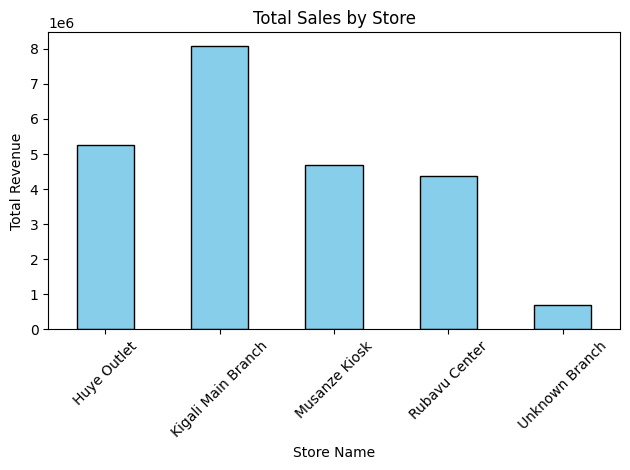

In [29]:
# total sales by product
import matplotlib.pyplot as plt

store_sales = df.groupby("Store Name")["Total Revenue"].sum()

store_sales.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Sales by Store")
plt.xlabel("Store Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


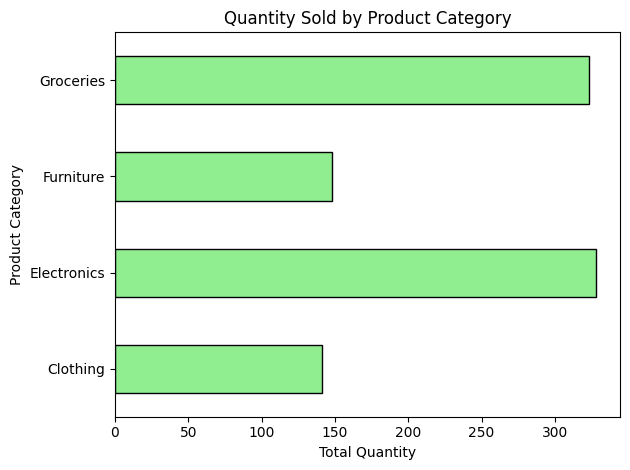

In [30]:
#Quantity Sold by Product Category
category_qty = df.groupby("Product Category")["Quantity Sold"].sum()

category_qty.plot(kind="barh", color="lightgreen", edgecolor="black")
plt.title("Quantity Sold by Product Category")
plt.xlabel("Total Quantity")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

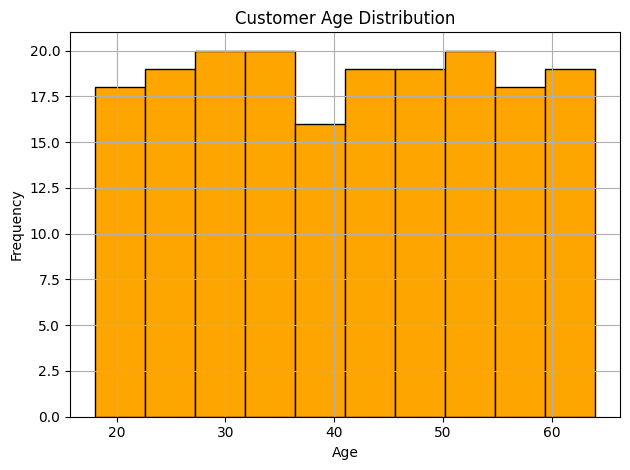

In [31]:
#Customer Age Distribution
df["Customer Age"].plot(kind="hist", bins=10, color="orange", edgecolor="black")
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
df.to_excel("cleaned_sales_data.xlsx", index=False)
